# Carga de librerias necesarias

In [9]:
import pandas as pd
import nltk
import spacy
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tqdm.notebook import tqdm
from datetime import datetime as dt
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer, one_hot

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import softmax
import re
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Cargamos SpaCy
# spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

# Descargamos los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Cargamos las stopwords en español
stop_words = set(stopwords.words('spanish'))

# Para realizar el stemming
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to E:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to E:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to E:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Carga de documento

In [3]:
with open('../DATASET/tweets/1.txt', 'rt') as f:
    tw1_txt = f.read()

print(tw1_txt)

Reporte 30, día 30
El taller Popocatépetl Motors ( propiedad de 
@LuisMendozaBJ
 ) usa el carril del RTP como estacionamiento y extensión de su patio de maniobras, bloquea banquetas y pasos peatonales. Debido a esto es el causante de varios accidentes viales. 
@UCS_GCDMX
 
@SSC_CDMX


# Transform del texto

In [4]:
tw1_tokens = word_tokenize(tw1_txt)

# Podemos filtrar los todos los tokens que no nos interesen, como todos los signos de puntuacion
# Mediante la funcion isalpha()
tw1_tokens_filtered = [token for token in tw1_tokens if token.isalpha()]

print(len(tw1_tokens), len(tw1_tokens_filtered))

51 38


In [5]:
def spacy_tokenizer(sentence):
    doc = nlp(sentence)
    return [token.text for token in doc]

In [7]:
# Probamos el tokenizador de SpaCy
tw1_spacy_tokens_filtered = spacy_tokenizer(tw1_txt)

In [8]:
print(len(tw1_tokens), len(tw1_tokens_filtered), len(tw1_spacy_tokens_filtered))

51 38 53


In [9]:
# Filtramos las palabras vacias ya que son aquellas palabras que no cont
tw1_tokens_filtered = [word for word in tw1_tokens_filtered if word.lower() not in stop_words]
print(len(tw1_tokens_filtered))

23


In [15]:
print(tw1_tokens_filtered[:20]) # Se trata de una queja

['Reporte', 'día', 'taller', 'Popocatépetl', 'Motors', 'propiedad', 'LuisMendozaBJ', 'usa', 'carril', 'RTP', 'estacionamiento', 'extensión', 'patio', 'maniobras', 'bloquea', 'banquetas', 'pasos', 'peatonales', 'Debido', 'causante']


# Carga del texto

In [17]:
import duckdb as ddb
import pandas as pd

In [23]:
# Acomodamos los datos en un diccionario
tw1_dict = {
    'id': '1.txt', # ID del documento
    'text': tw1_txt, # Texto original
    'tokens': tw1_tokens_filtered, # Tokens filtrados
    'tipo': 'queja', # TODO: Definir un metodo para clasificar el tipo de tweet
    'fecha': dt.now().strftime('%Y-%m-%d %H:%M:%S')
}

In [25]:
# Cargamos los datos en un dataframe
df = pd.DataFrame([tw1_dict])

# Mostramos el dataframe con duckdb
ddb.sql('SELECT id, text[:20], tokens[:10], tipo, fecha FROM df')

┌─────────┬───────────────────────┬──────────────────────────────────────────────────────────────────────────────────────────┬─────────┬─────────────────────┐
│   id    │      "text"[:20]      │                                       tokens[:10]                                        │  tipo   │        fecha        │
│ varchar │        varchar        │                                        varchar[]                                         │ varchar │       varchar       │
├─────────┼───────────────────────┼──────────────────────────────────────────────────────────────────────────────────────────┼─────────┼─────────────────────┤
│ 1.txt   │ Reporte 30, día 30\nE │ [Reporte, día, taller, Popocatépetl, Motors, propiedad, LuisMendozaBJ, usa, carril, RTP] │ queja   │ 2025-04-07 22:48:13 │
└─────────┴───────────────────────┴──────────────────────────────────────────────────────────────────────────────────────────┴─────────┴─────────────────────┘

In [20]:
# Generacion de la nube de palabras
cloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(tw1_txt)

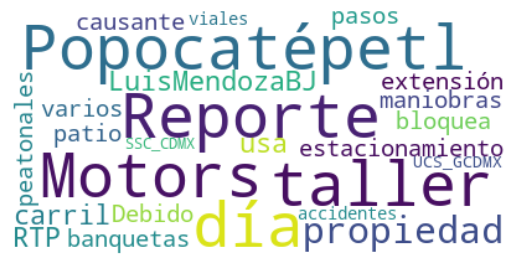

In [21]:
# Mostramos la imagen con matplotlib
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

El form de quejas de APP CDMX contiene los campos:
- descripcion
- latitude
- longitude
- Direccion
    - Calle
    - No Exterior
    - No Interior
    - CP
    - Colonia
    - Entre Calles
    - Y Calle
- Foto evidencia (hasta 2MB)

Y genera un folio: SUAC-0704253213830

Tarda 5 dias en ser atendido.

# Diseño para el ETL

![](../images/proyecto_rtp.png)

# LLM

In [ ]:
# Generar ground of truth

In [ ]:
# Text to Vector